In [2]:
# dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn import tree
%matplotlib inline

In [26]:
import pandas as pd
import psycopg2
import config as creds

In [27]:
conn_string = "host="+ creds.PGHOST +" port="+ "5432" +" dbname="+ creds.PGDATABASE +" user=" + creds.PGUSER \
                  +" password="+ creds.PGPASSWORD
    
print(conn_string)

host=aws-pg-db001.chpuoe9ndogr.us-east-1.rds.amazonaws.com port=5432 dbname=covid user=postgres password=awsdbpassword001


In [28]:
conn = psycopg2.connect(conn_string)
# print("Connected!")

In [29]:
covid_df = pd.read_sql_query(
                   ''' SELECT * FROM coviddata 
                   ''' , conn)

In [30]:
covid_df

,id,country,province_state,studypopsize,covidtestresult,meanage,agegroup_pediatrics,agegroup_youngadult,agegroup_aging,gender_male,...,diarrhea,nauseavomiting,anorexia,sorethroat_congestion,chills,chestpain,losssmelltaste,asymptomatic,mortality,mortality_bin
0,1 ...,China ...,Wuhan ...,191 ...,Positive only ...,56 ...,0 ...,0 ...,0 ...,1 ...,...,0.05 ...,0.04 ...,0 ...,0 ...,0 ...,0 ...,0 ...,0 ...,0.28 ...,1 ...
1,1 ...,China ...,Wuhan ...,54 ...,Positive only ...,69 ...,0 ...,0 ...,1 ...,1 ...,...,0.04 ...,0.06 ...,0 ...,0 ...,0 ...,0 ...,0 ...,0 ...,1 ...,1 ...
2,1 ...,China ...,Wuhan ...,137 ...,Positive only ...,52 ...,0 ...,0 ...,0 ...,1 ...,...,0.05 ...,0.03 ...,0 ...,0 ...,0 ...,0 ...,0 ...,0 ...,0 ...,0 ...
3,2 ...,China ...,Wuhan ...,199 ...,Positive only ...,58 ...,0 ...,0 ...,0 ...,1 ...,...,0.02 ...,0.04 ...,0.01 ...,0 ...,0 ...,0 ...,0 ...,0 ...,0.16 ...,1 ...
4,2 ...,China ...,Wuhan ...,99 ...,Positive only ...,59 ...,0 ...,0 ...,0 ...,1 ...,...,0.04 ...,0.09 ...,0.02 ...,0 ...,0 ...,0 ...,0 ...,0 ...,0.15 ...,1 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,199 ...,China ...,Hubei ...,78 ...,Positive only ...,64 ...,0 ...,0 ...,0 ...,1 ...,...,0.03 ...,0.03 ...,0 ...,0 ...,0 ...,0 ...,0 ...,0 ...,0.13 ...,1 ...
1152,200 ...,USA ...,New York ...,151 ...,Positive only ...,56 ...,0 ...,0 ...,0 ...,1 ...,...,0.2 ...,0.09 ...,0 ...,0.11 ...,0.15 ...,0 ...,0 ...,0 ...,0.15 ...,1 ...
1153,200 ...,USA ...,New York ...,618 ...,Positive only ...,63 ...,0 ...,0 ...,0 ...,0 ...,...,0.25 ...,0.22 ...,0 ...,0.08 ...,0.19 ...,0 ...,0 ...,0 ...,0.13 ...,1 ...
1154,200 ...,USA ...,New York ...,231 ...,Positive only ...,62 ...,0 ...,0 ...,0 ...,1 ...,...,0.21 ...,0.1 ...,0 ...,0.08 ...,0.16 ...,0 ...,0 ...,0 ...,0.31 ...,1 ...


In [3]:
df = pd.read_csv('cleaned_data.csv')


Question 1: Is Age a factor in determining high risk mortality? 

In [4]:
age_plot = df[['Mean Age','Mortality','Mortality_bin']]
age_plot

,Mean Age,Mortality,Mortality_bin
0,56,0.28,1
1,69,1.00,1
2,52,0.00,0
3,58,0.16,1
4,59,0.15,1
...,...,...,...
1151,64,0.13,1
1152,56,0.15,1
1153,63,0.13,1
1154,62,0.31,1


In [5]:
X = age_plot[["Mean Age"]]
y = age_plot[["Mortality"]]
print(X.shape, y.shape)

(1156, 1) (1156, 1)


Text(0.5, 1.0, 'Age vs Mortality')

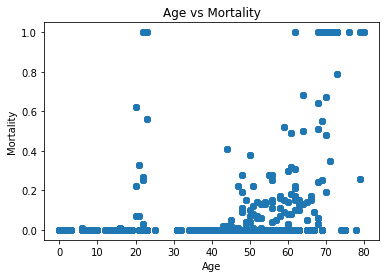

In [6]:
# Comment about this plot and how 20s have high mortality 
plt.scatter(X,age_plot[["Mortality"]])
plt.xlabel('Age')
plt.ylabel('Mortality')
plt.title('Age vs Mortality')

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)

In [9]:
kmeans.fit(X_test, y_test)

KMeans(n_clusters=6)

In [10]:
predicted_clusters = kmeans.predict(X_test)

In [11]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_


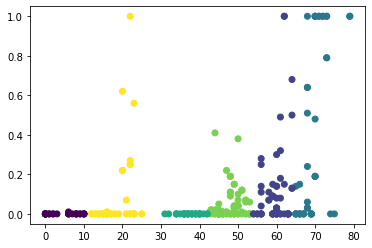

In [12]:
plt.scatter(X_test, y_test, c = labels, cmap='viridis')

In [13]:
X_test, predicted_clusters, y_test

(      Mean Age
 972         23
 202         63
 661         37
 1049        22
 953         63
 ...        ...
 325         56
 386         61
 329         42
 1126        48
 59          38
 
 [289 rows x 1 columns],
 array([5, 1, 3, 5, 1, 3, 2, 2, 1, 1, 4, 1, 5, 2, 4, 5, 4, 0, 4, 4, 0, 5,
        2, 0, 1, 5, 0, 2, 5, 4, 0, 4, 4, 1, 1, 5, 5, 0, 2, 2, 4, 2, 3, 4,
        1, 1, 5, 4, 0, 0, 5, 0, 2, 3, 3, 4, 4, 5, 2, 4, 4, 1, 4, 2, 1, 4,
        1, 4, 3, 4, 4, 2, 1, 2, 4, 4, 2, 2, 4, 2, 2, 1, 4, 4, 5, 2, 3, 4,
        4, 1, 5, 4, 4, 0, 3, 5, 1, 4, 1, 4, 2, 2, 2, 0, 0, 1, 1, 1, 4, 1,
        1, 1, 5, 5, 4, 4, 4, 1, 5, 4, 1, 1, 1, 5, 1, 5, 2, 2, 0, 4, 1, 1,
        3, 4, 3, 4, 3, 4, 3, 0, 1, 4, 5, 3, 2, 4, 1, 0, 4, 1, 0, 3, 2, 5,
        4, 5, 0, 4, 5, 0, 4, 0, 5, 5, 4, 4, 2, 4, 5, 5, 1, 3, 2, 2, 4, 4,
        0, 5, 1, 1, 0, 2, 1, 2, 2, 0, 4, 2, 1, 0, 1, 4, 4, 5, 2, 5, 4, 0,
        5, 1, 3, 4, 4, 4, 2, 0, 4, 1, 3, 3, 3, 4, 1, 3, 5, 3, 4, 1, 4, 3,
        0, 4, 4, 4, 4, 1, 4, 2, 5, 0, 2, 

In [14]:
risk_age = pd.DataFrame(X_test)

In [15]:
risk_age.reset_index(drop=True, inplace=True)

In [16]:
predicted_clusters =pd.DataFrame(predicted_clusters)
predicted_clusters

,0
0,5
1,1
2,3
3,5
4,1
...,...
284,1
285,1
286,3
287,4


In [17]:
risk_age['predicted_clusters']=predicted_clusters


In [18]:
y_test.reset_index(drop=True, inplace=True)

In [19]:
y_test

,Mortality
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
...,...
284,0.04
285,0.49
286,0.00
287,0.19


In [20]:
risk_age['Mortality']= y_test

In [21]:
riskAge = risk_age

In [22]:
# riskAge = risk_age.drop(['y_test'], axis=1)

In [23]:
riskAge.sort_values(by=['predicted_clusters'])

,Mean Age,predicted_clusters,Mortality
150,8,0,0.00
185,0,0,0.00
26,6,0,0.00
272,9,0,0.00
30,6,0,0.01
...,...,...,...
259,22,5,0.00
169,22,5,0.25
142,20,5,0.22
57,16,5,0.00


In [24]:
mort = riskAge.groupby(by=["predicted_clusters"]).mean('Mortality')
new_mort = mort.rename(columns={'Mortality':'AvgMortality'})

In [25]:
minimum = riskAge.groupby(by=["predicted_clusters"]).min('Mean Age')
new_min = minimum.rename(columns={'Mean Age':'MinAge'})

In [26]:
maximum = riskAge.groupby(by=["predicted_clusters"]).max('Mean Age')
new_max = maximum.rename(columns={'Mean Age':'MaxAge'})

In [27]:
# Group 0 age 54-64 with mortality of 0.100147
# Group 1 age 12-25 with mortality of 0.094681
# Group 2 

In [28]:
combined=pd.concat([new_mort, new_min, new_max],axis=1)
combined

,Mean Age,AvgMortality,MinAge,Mortality,MaxAge,Mortality
predicted_clusters,,,,,,
0,4.333333,0.000333,0,0.0,10,0.01
1,59.627119,0.117119,54,0.0,64,1.00
2,69.326087,0.371087,65,0.0,79,1.00
3,37.290323,0.000000,31,0.0,42,0.00
4,47.662500,0.044125,43,0.0,53,0.41
5,18.511628,0.086047,12,0.0,25,1.00


In [29]:
results = combined[['AvgMortality','MinAge','MaxAge']]
results
# tableau visual? export as file 

,AvgMortality,MinAge,MaxAge
predicted_clusters,,,
0,0.000333,0,10
1,0.117119,54,64
2,0.371087,65,79
3,0.000000,31,42
4,0.044125,43,53
5,0.086047,12,25


In [30]:
# end of question 1 

In [31]:
results.sort_values(by=['AvgMortality']) #vaccine recommendations? Why ages 12-25 higher mortality? 
# possible mental illness and also socializing via covid parties etc... 

,AvgMortality,MinAge,MaxAge
predicted_clusters,,,
3,0.000000,31,42
0,0.000333,0,10
4,0.044125,43,53
5,0.086047,12,25
1,0.117119,54,64
2,0.371087,65,79


In [ ]:
# redo on whole data? also need to score? 